In [1]:
!nvidia-smi


Tue Apr 11 09:56:11 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.41                 Driver Version: 531.41       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti    WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   45C    P8                4W /  N/A|    303MiB /  4096MiB |      2%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


#Importing Libraries

In [3]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import cv2
import numpy as np
from glob import glob


In [4]:
ROOT_PATH=r'C:\Users\rctuh\Desktop\minor projects\Vgg16_Image_Classifier\cats_and_dogs\cats_and_dogs'

In [5]:
pwd

'c:\\Users\\rctuh\\Desktop\\minor projects\\Vgg16_Image_Classifier'

In [6]:
import os 
os.chdir(ROOT_PATH)
os.getcwd()

'C:\\Users\\rctuh\\Desktop\\minor projects\\Vgg16_Image_Classifier\\cats_and_dogs\\cats_and_dogs'

In [7]:
train_path=r"C:\Users\rctuh\Desktop\minor projects\Vgg16_Image_Classifier\cats_and_dogs\cats_and_dogs\train"
test_path=r"C:\Users\rctuh\Desktop\minor projects\Vgg16_Image_Classifier\cats_and_dogs\cats_and_dogs\test"
val_path=r"C:\Users\rctuh\Desktop\minor projects\Vgg16_Image_Classifier\cats_and_dogs\cats_and_dogs\validation"

In [8]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

In [9]:
x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

In [10]:
x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [11]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

#Resizing all images

In [12]:
IMAGE_SIZE=[224,224]

#Importing VGG16 library and add preprocesing layer in front of the VGG16.
#Here we will se ImageNet weights

In [13]:
vgg16=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

include_top= False means that we will cut off the last dense layer of pre-trained model of VGG16 as it was trained for 1000 output categories of imagenet whereas we only have 3 categories. We also cut off the 1st layer because the input image and the size can be of my choice.

In [14]:
for layers in vgg16.layers:
  print(layers)

###Setting layer.trainable to False moves all the layer's weights from trainable to non-trainable. This is called "freezing" the layer: the state of a frozen layer won't be updated during training (either when training with fit() or when training with any custom loop that relies on trainable_weights to apply gradient updates).

In [15]:
for layer in vgg16.layers:
  layer.trainable=False

In [16]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


#Vgg16 Model Summary

In [17]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#Building the Final Model 


In [18]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='Softmax'))


#View the structure of final model

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,137,986
Trainable params: 6,423,298
Non-trainable params: 14,714,688
_________________________________________________________________


#Specifying the Cost and Optimization Methods

In [20]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics='accuracy'
)

#Using the Image Data Generator to import images from dataset

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1./255,
                                  shear_range =0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen =  ImageDataGenerator(rescale = 1./255)

In [22]:
pwd

'C:\\Users\\rctuh\\Desktop\\minor projects\\Vgg16_Image_Classifier\\cats_and_dogs\\cats_and_dogs'

In [23]:
training_set=train_datagen.flow_from_directory(r'C:\Users\rctuh\Desktop\minor projects\Vgg16_Image_Classifier\cats_and_dogs\cats_and_dogs\train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')


Found 2000 images belonging to 2 classes.


In [24]:
test_set=test_datagen.flow_from_directory(r'C:\Users\rctuh\Desktop\minor projects\Vgg16_Image_Classifier\cats_and_dogs\cats_and_dogs\test',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical'
                                            )

Found 1000 images belonging to 2 classes.


In [25]:
val_set=val_datagen.flow_from_directory(r'C:\Users\rctuh\Desktop\minor projects\Vgg16_Image_Classifier\cats_and_dogs\cats_and_dogs\validation',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical'
                                            )

Found 50 images belonging to 2 classes.


In [26]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [27]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((2000,), (1000,), (50,))

#Early stopping to avoid overfitting of model

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)


#Model Fitting

In [31]:
r= model.fit(
    training_set,
    validation_data=val_set,
    epochs=100,
    verbose = 1,
    callbacks=[early_stop] 
)   

Epoch 1/100
63/63 [==============================] - 266s 4s/step - loss: 0.0576 - accuracy: 0.9785 - val_loss: 0.0743 - val_accuracy: 0.9695
Epoch 2/100
63/63 [==============================] - 269s 4s/step - loss: 0.0690 - accuracy: 0.9750 - val_loss: 0.0353 - val_accuracy: 0.9910
Epoch 3/100
63/63 [==============================] - 265s 4s/step - loss: 0.0503 - accuracy: 0.9825 - val_loss: 0.0751 - val_accuracy: 0.9680
Epoch 4/100
63/63 [==============================] - 338s 5s/step - loss: 0.0545 - accuracy: 0.9755 - val_loss: 0.0635 - val_accuracy: 0.9790
Epoch 5/100
63/63 [==============================] - 276s 4s/step - loss: 0.0615 - accuracy: 0.9720 - val_loss: 0.0515 - val_accuracy: 0.9835
Epoch 6/100
63/63 [==============================] - 268s 4s/step - loss: 0.1006 - accuracy: 0.9610 - val_loss: 0.1148 - val_accuracy: 0.9525
Epoch 7/100
63/63 [==============================] - 252s 4s/step - loss: 0.0607 - accuracy: 0.9730 - val_loss: 0.0429 - val_accuracy: 0.9850
Epoch 

#Plotting the Losses

In [32]:
import matplotlib.pyplot as plt

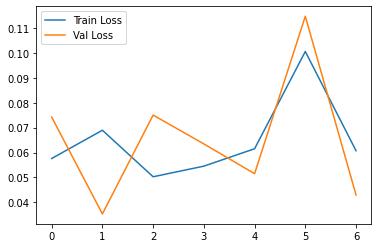

<Figure size 432x288 with 0 Axes>

In [33]:
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#Plotting Accuracy 


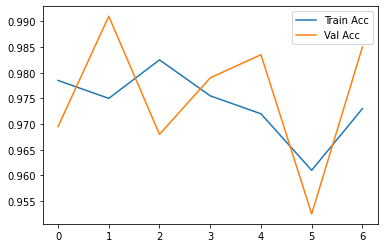

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(r.history['accuracy'], label='Train Acc')
plt.plot(r.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#Saving the File as .h5 Type


In [35]:
from tensorflow.keras.models import load_model 
model.save('model_vgg16.h5')

#Predictions

In [36]:
y_pred=model.predict(test_set)


32/32 [==============================] - 67s 2s/step


In [37]:
y_pred

array([[8.9883417e-02, 9.1011655e-01],
       [9.9994850e-01, 5.1475043e-05],
       [2.8229402e-07, 9.9999976e-01],
       ...,
       [1.0000000e+00, 2.7502498e-08],
       [3.8372216e-01, 6.1627775e-01],
       [9.9425113e-01, 5.7488508e-03]], dtype=float32)

In [38]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [39]:
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,

In [40]:
from tensorflow.keras.preprocessing import image


In [54]:
model=load_model('model_vgg16.h5')
img_path=r'C:\Users\rctuh\Desktop\minor projects\Vgg16_Image_Classifier\cats_and_dogs\cats_and_dogs\validation\dogs\2.jpg'
img=image.load_img(img_path,target_size=(224,224))


In [55]:
x=image.img_to_array(img)

In [56]:
Z=plt.imread(img_path)

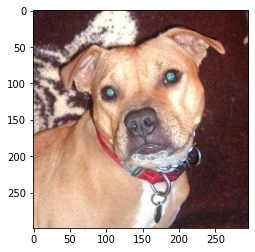

In [57]:
plt.imshow(Z)

In [58]:
x.shape


(224, 224, 3)

In [59]:
x=x/255

In [60]:
from keras.applications.vgg16 import preprocess_input 

In [61]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [62]:
model.predict(img_data)

1/1 [==============================] - 0s 284ms/step


array([[9.9961555e-01, 3.8439594e-04]], dtype=float32)

In [63]:
result=np.argmax(model.predict(img_data),axis=1)

1/1 [==============================] - 0s 129ms/step


In [64]:
result

array([0], dtype=int64)

In [65]:
if result[0] == 1:
  prediction = "The Given Image is of a Dog"
  print(prediction)
else:
  prediction="The Given Image is of a cat"
  print(prediction)
  

The Given Image is of a cat


Losses and Accuracy 


In [66]:
 from sklearn.metrics import accuracy_score
 from sklearn.metrics import f1_score
 from sklearn.metrics import roc_auc_score


In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
f1_score(test_y,y_pred)

0.4855371900826446

In [186]:
accuracy_score(test_y, y_pred)

0.522

In [187]:
roc_auc_score(test_y,y_pred)

0.522

In [188]:
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.51      0.52      0.52       488
           1       0.53      0.52      0.53       512

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.52      0.52      0.52      1000



In [189]:
print(confusion_matrix(y_pred,test_y))

[[255 233]
 [245 267]]
